In [1]:
import pandas as pd
import json

In [2]:
df = pd.read_json('/Users/james/code/hello-world/data/TPS.json')
df

,0,1
0,1758802140,142.216667
1,1758802200,114.750000
2,1758802260,107.750000
3,1758802320,207.883333
4,1758802380,171.416667
...,...,...
1436,1758888300,173.883333
1437,1758888360,118.783333
1438,1758888420,92.300000
1439,1758888480,90.766667


In [72]:
df = pd.read_json('/Users/james/code/hello-world/data/metrics/disk_usage.json')
df


,0,1
0,1756686600,0.601587
1,1756688400,0.601426
2,1756690200,0.601484
3,1756692000,0.601747
4,1756693800,0.602524
...,...,...
1055,1758884400,0.623967
1056,1758886200,0.622942
1057,1758888000,0.623495
1058,1758889800,0.623264


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [50]:
df[0]

0       1758285300
1       1758285600
2       1758285900
3       1758286200
4       1758286500
           ...    
2012    1758888900
2013    1758889200
2014    1758889500
2015    1758889800
2016    1758890100
Name: 0, Length: 2017, dtype: int64

In [56]:
import warnings
warnings.filterwarnings('ignore')
# """预处理时间戳和TPS数据"""
# # 自动检测时间戳列
# timestamp_cols = [col for col in df.columns 
#                     if any(word in col.lower() for word in ['time', 'timestamp', 'date', 'ts'])]

# if not timestamp_cols:
#     print("未找到时间戳列，使用第一列作为时间戳")
#     timestamp_col = df.columns[0]
# else:
#     timestamp_col = timestamp_cols[0]

# # 自动检测TPS列
# tps_cols = [col for col in df.columns 
#             if any(word in col.lower() for word in ['tps', 'throughput', 'transactions'])]

# if not tps_cols:
#     print("未找到TPS列，使用第二列作为TPS数据")
#     tps_col = df.columns[1] if len(df.columns) > 1 else df.columns[0]
# else:
#     tps_col = tps_cols[0]


In [73]:

# # 确保时间戳格式正确
# if df[timestamp_col].dtype == 'object':
#     df[timestamp_col] = pd.to_datetime(df[timestamp_col])
# elif df[timestamp_col].dtype == 'int64':
#     # 假设是Unix时间戳
#     df[timestamp_col] = pd.to_datetime(df[timestamp_col], unit='s')

# # 按时间排序
# df = df.sort_values(timestamp_col)

# # 设置时间戳为索引
# df.set_index(timestamp_col, inplace=True)

# timestamp_col = timestamp_col
# tps_col = tps_col

df['timestamp_col'] = pd.to_datetime(df[0], unit='s')

# 按时间排序
df = df.sort_values('timestamp_col')

# 设置时间戳为索引
df.set_index("timestamp_col", inplace=True)

df

,0,1
timestamp_col,,
2025-09-01 00:30:00,1756686600,0.601587
2025-09-01 01:00:00,1756688400,0.601426
2025-09-01 01:30:00,1756690200,0.601484
2025-09-01 02:00:00,1756692000,0.601747
2025-09-01 02:30:00,1756693800,0.602524
...,...,...
2025-09-26 11:00:00,1758884400,0.623967
2025-09-26 11:30:00,1758886200,0.622942
2025-09-26 12:00:00,1758888000,0.623495


In [75]:
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


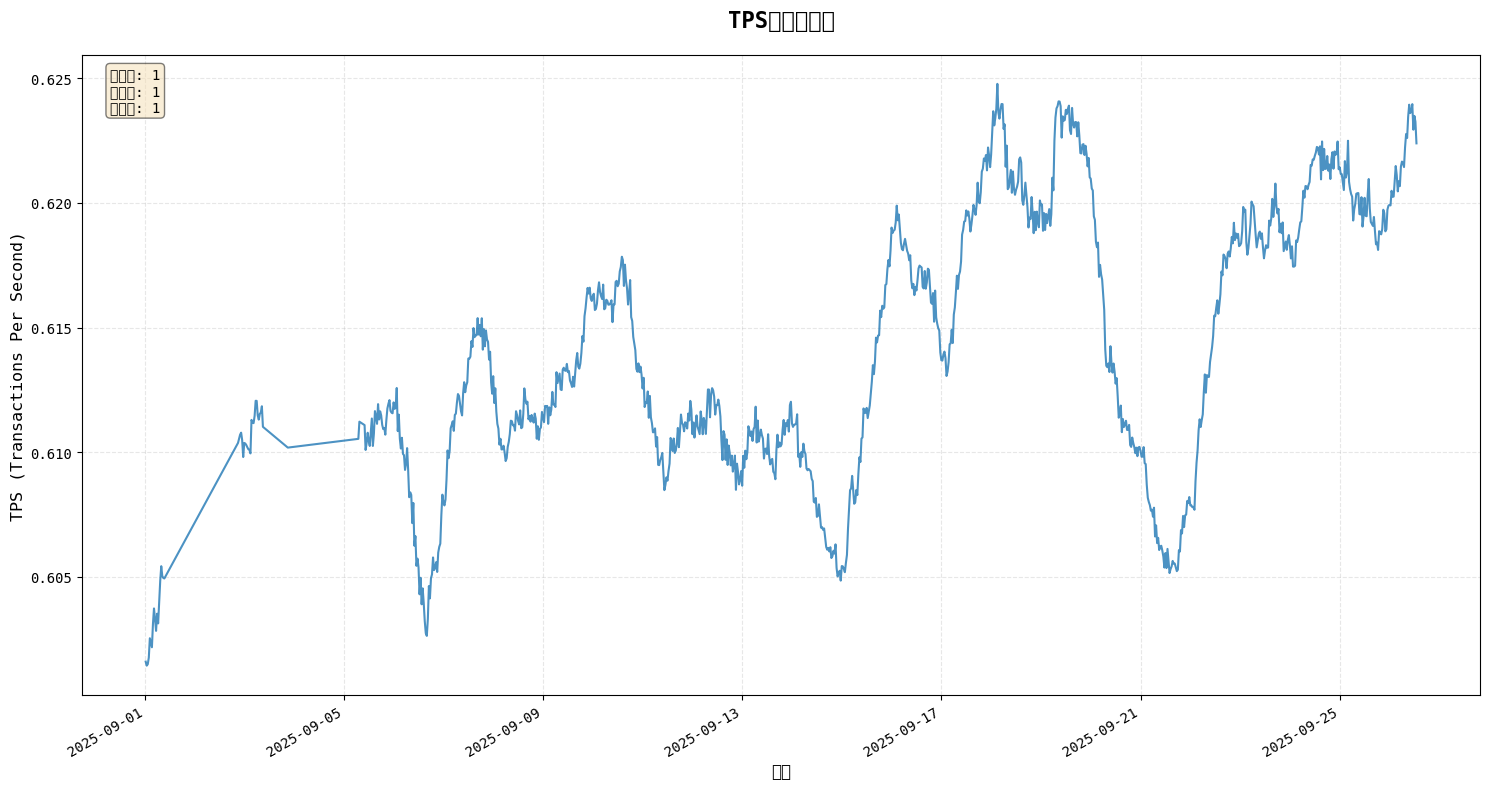

In [76]:
"""绘制基础折线图"""
timestamp_col, tps_col = 0,1
figsize=(15, 8)
save_path=False
plt.figure(figsize=figsize)

# 绘制折线图
plt.plot(df.index, df[tps_col], 
        linewidth=1.5, color='#1f77b4', alpha=0.8)

# 设置图表样式
plt.title('TPS时间序列图', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('时间', fontsize=12)
plt.ylabel('TPS (Transactions Per Second)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# 格式化x轴标签
plt.gcf().autofmt_xdate()

# 添加统计信息
max_tps = df[tps_col].max()
min_tps = df[tps_col].min()
avg_tps = df[tps_col].mean()

stats_text = f'最大值: {max_tps:.0f}\n最小值: {min_tps:.0f}\n平均值: {avg_tps:.0f}'
plt.text(0.02, 0.98, stats_text, 
        transform=plt.gca().transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

if save_path:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x800 with 0 Axes>

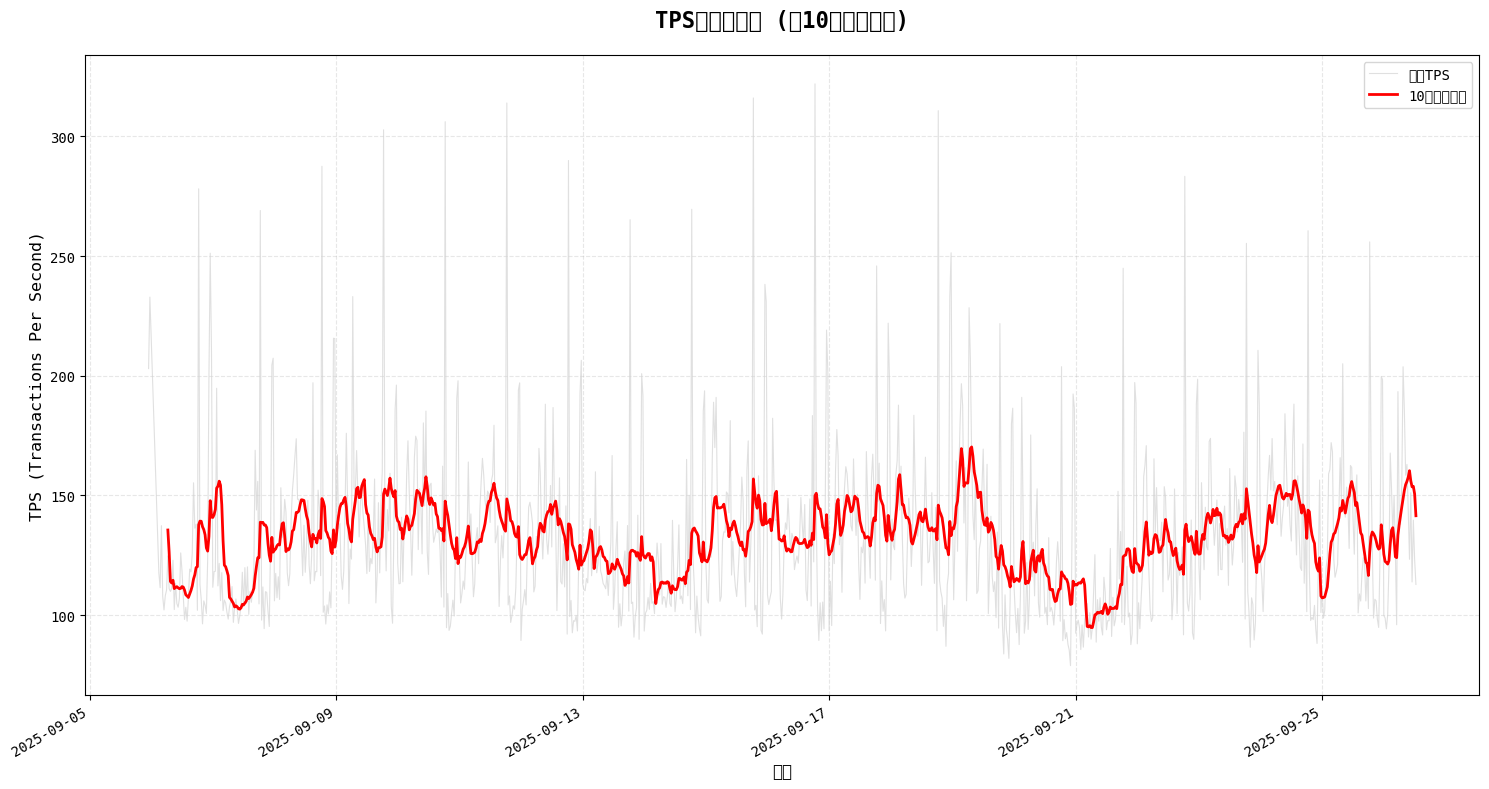

In [60]:
"""绘制带有移动平均线的TPS图"""
timestamp_col, tps_col = 0,1
figsize=(15, 8)
window=10
save_path=False
plt.figure(figsize=figsize)

# 计算移动平均线
rolling_mean = df[tps_col].rolling(window=window).mean()

plt.figure(figsize=figsize)

# 绘制原始数据
plt.plot(df.index, df[tps_col], 
        linewidth=0.8, color='lightgray', alpha=0.7, label='原始TPS')

# 绘制移动平均线
plt.plot(df.index, rolling_mean, 
        linewidth=2, color='red', label=f'{window}点移动平均')

plt.title(f'TPS时间序列图 (含{window}点移动平均)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('时间', fontsize=12)
plt.ylabel('TPS (Transactions Per Second)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.gcf().autofmt_xdate()
plt.tight_layout()

if save_path:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

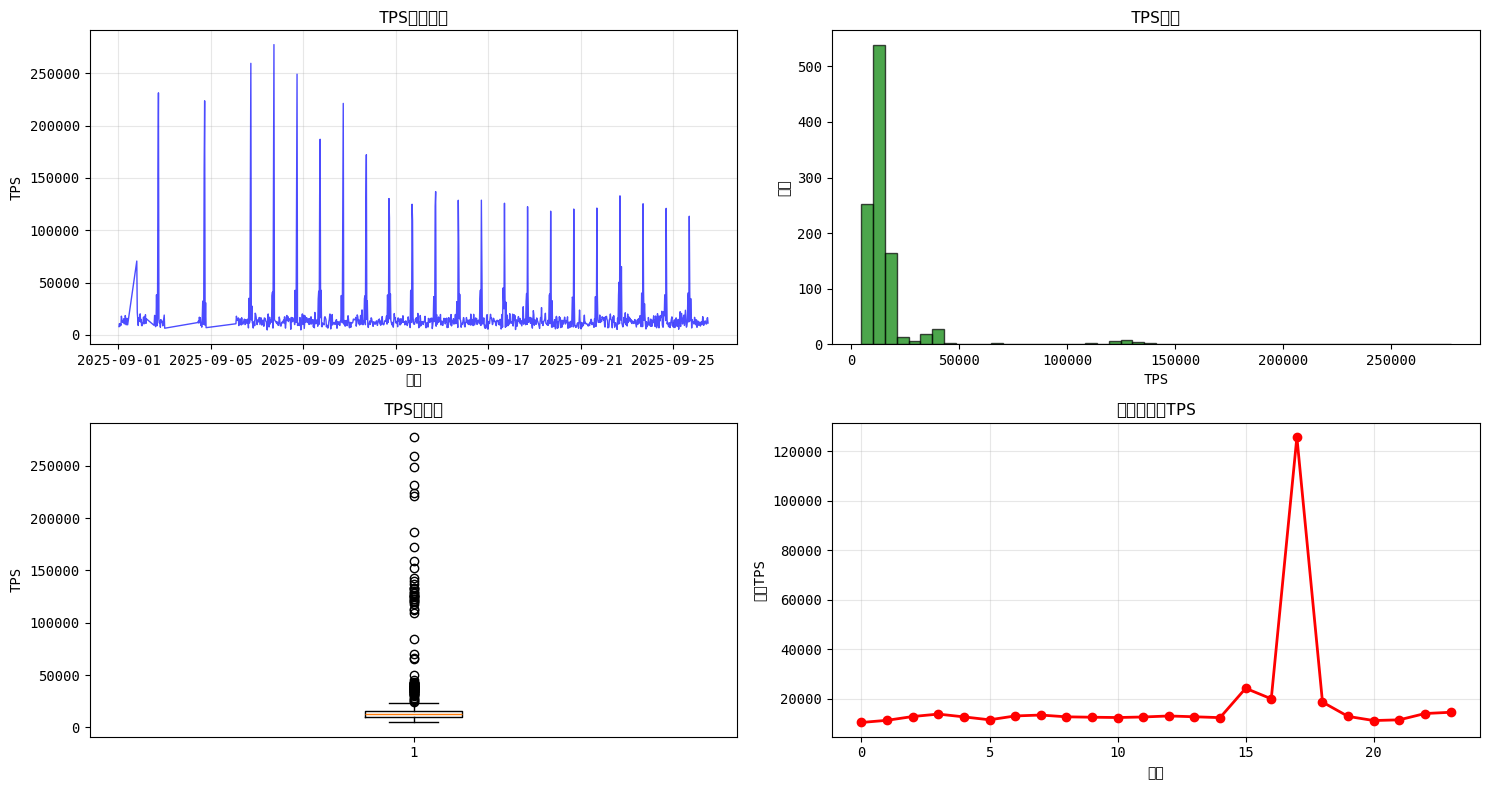

In [68]:
"""绘制时间序列和分布的组合图"""
# timestamp_col, tps_col = preprocess_data()

fig, axes = plt.subplots(2, 2, figsize=figsize)

# 1. 时间序列图
axes[0, 0].plot(df.index, df[tps_col], 
                linewidth=1, color='blue', alpha=0.7)
axes[0, 0].set_title('TPS时间序列')
axes[0, 0].set_xlabel('时间')
axes[0, 0].set_ylabel('TPS')
axes[0, 0].grid(True, alpha=0.3)

# 2. TPS分布直方图
axes[0, 1].hist(df[tps_col], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('TPS分布')
axes[0, 1].set_xlabel('TPS')
axes[0, 1].set_ylabel('频次')

# 3. 箱线图
axes[1, 0].boxplot(df[tps_col])
axes[1, 0].set_title('TPS箱线图')
axes[1, 0].set_ylabel('TPS')

# 4. 小时级别的TPS趋势
df['hour'] = df.index.hour
hourly_tps = df.groupby('hour')[tps_col].mean()
axes[1, 1].plot(hourly_tps.index, hourly_tps.values, 
                marker='o', linewidth=2, markersize=6, color='red')
axes[1, 1].set_title('每小时平均TPS')
axes[1, 1].set_xlabel('小时')
axes[1, 1].set_ylabel('平均TPS')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

if save_path:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

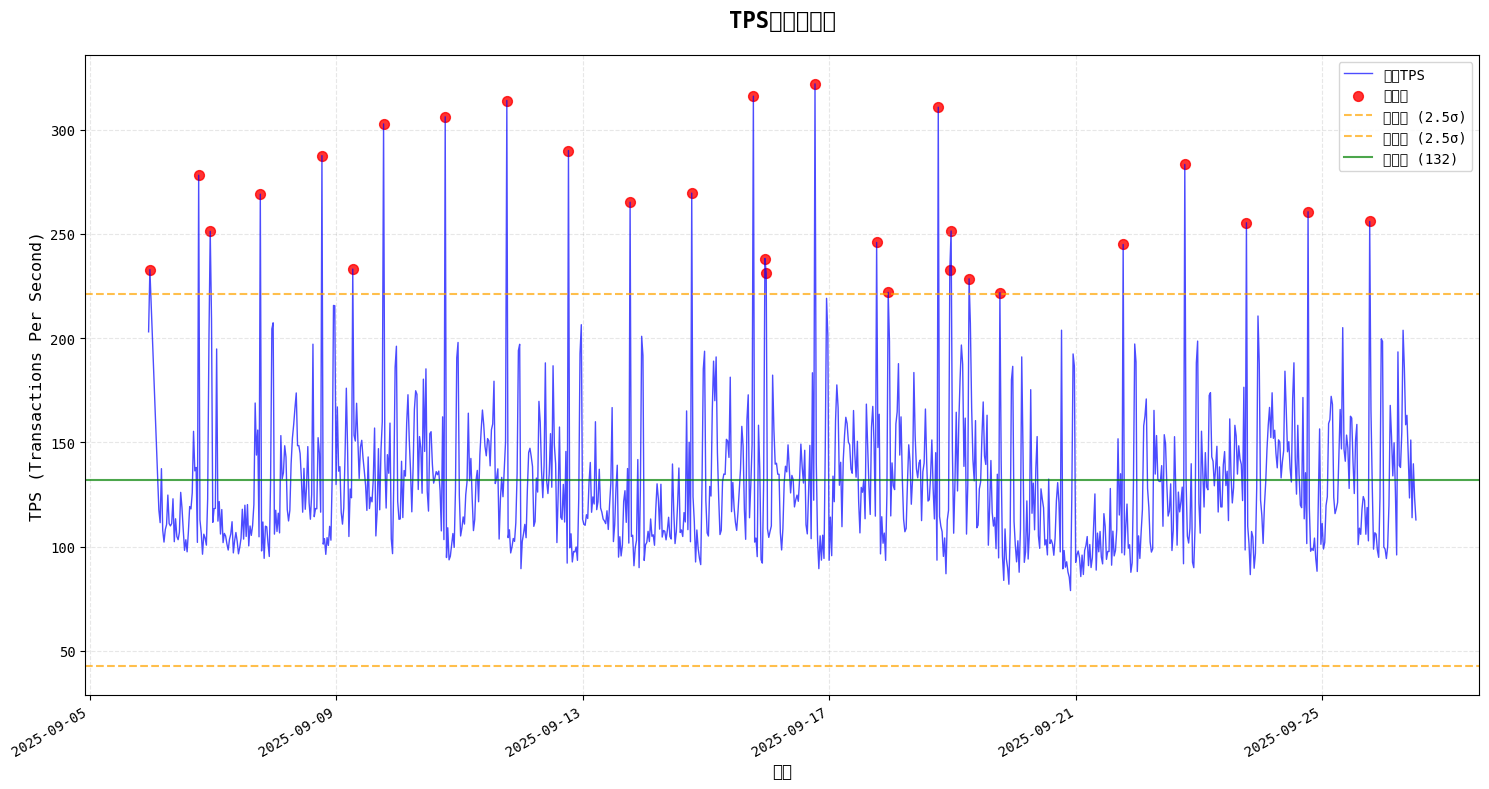

检测到 28 个异常值


In [62]:
"""绘制异常值检测图"""
# timestamp_col, tps_col = preprocess_data()
threshold=2.5
figsize=(15, 8)
save_path=None
# 计算统计信息
mean_tps = df[tps_col].mean()
std_tps = df[tps_col].std()

# 定义异常值阈值
upper_bound = mean_tps + threshold * std_tps
lower_bound = mean_tps - threshold * std_tps

# 识别异常值
anomalies = df[(df[tps_col] > upper_bound) | 
                    (df[tps_col] < lower_bound)]

plt.figure(figsize=figsize)

# 绘制正常数据
plt.plot(df.index, df[tps_col], 
        linewidth=1, color='blue', alpha=0.7, label='正常TPS')

# 绘制异常数据
if len(anomalies) > 0:
    plt.scatter(anomalies.index, anomalies[tps_col], 
                color='red', s=50, alpha=0.8, label='异常值')

# 绘制阈值线
plt.axhline(y=upper_bound, color='orange', linestyle='--', 
            alpha=0.7, label=f'上阈值 ({threshold}σ)')
plt.axhline(y=lower_bound, color='orange', linestyle='--', 
            alpha=0.7, label=f'下阈值 ({threshold}σ)')
plt.axhline(y=mean_tps, color='green', linestyle='-', 
            alpha=0.7, label=f'平均值 ({mean_tps:.0f})')

plt.title('TPS异常值检测', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('时间', fontsize=12)
plt.ylabel('TPS (Transactions Per Second)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.gcf().autofmt_xdate()
plt.tight_layout()

if save_path:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"检测到 {len(anomalies)} 个异常值")

In [45]:

df[timestamp_col]


timestamp_col
2025-09-25 12:09:00    1758802140
2025-09-25 12:10:00    1758802200
2025-09-25 12:11:00    1758802260
2025-09-25 12:12:00    1758802320
2025-09-25 12:13:00    1758802380
                          ...    
2025-09-26 12:05:00    1758888300
2025-09-26 12:06:00    1758888360
2025-09-26 12:07:00    1758888420
2025-09-26 12:08:00    1758888480
2025-09-26 12:09:00    1758888540
Name: 0, Length: 1441, dtype: int64

In [63]:
"""获取数据摘要统计"""
# timestamp_col, tps_col = preprocess_data()

stats = {
    '总记录数': len(df),
    '时间范围': f"{df[0].min()} 到 {df[0].max()}",
    '时间跨度': str(df.index.max() - df.index.min()),
    'TPS最大值': df[tps_col].max(),
    'TPS最小值': df[tps_col].min(),
    'TPS平均值': df[tps_col].mean(),
    'TPS中位数': df[tps_col].median(),
    'TPS标准差': df[tps_col].std(),
    'TPS方差': df[tps_col].var(),
    '偏度': df[tps_col].skew(),
    '峰度': df[tps_col].kurtosis()
}
pd.Series(stats)

总记录数                          982
时间范围      1757113200 到 1758889800
时间跨度             20 days 13:30:00
TPS最大值                 321.941667
TPS最小值                  78.902222
TPS平均值                  131.96908
TPS中位数                 123.973056
TPS标准差                  35.628043
TPS方差                 1269.357483
偏度                       1.917598
峰度                       5.477896
dtype: object